In [5]:
cd ../report/

/home/scott/Documents/git/neukrill-net-work/report


In [6]:
import csv

In [7]:
import numpy as np

In [8]:
with open('leaderboardscores.csv', 'rb') as csvfile:
    lb = csv.reader(csvfile, delimiter=';')
    for row in lb:
        print row[3]

Score
0.565971
0.580300
0.587967
0.604112
0.606921
0.607333
0.610072
0.610964
0.613981
0.617123
0.619674
0.619722
0.620708
0.623529
0.625620
0.627582
0.629008
0.633647
0.634813
0.637492
0.637510
0.639206
0.641510
0.644150
0.645201
0.645573
0.646626
0.649622
0.649712
0.650670
0.654808
0.655795
0.656547
0.657061
0.660353
0.662100
0.662223
0.662241
0.662924
0.665556
0.667073
0.675780
0.677713
0.677916
0.678478
0.679511
0.681684
0.683645
0.687029
0.689614
0.692339
0.697469
0.699254
0.699467
0.700180
0.701704
0.704582
0.704775
0.704782
0.705380
0.705742
0.706741
0.707233
0.707695
0.713836
0.714217
0.718674
0.719978
0.720527
0.720987
0.722385
0.723187
0.724232
0.725161
0.725254
0.725418
0.728190
0.730720
0.732012
0.732933
0.733551
0.735462
0.738978
0.740716
0.740879
0.741624
0.743406
0.744238
0.745370
0.748310
0.749094
0.750231
0.750697
0.750743
0.751415
0.752094
0.752475
0.752682
0.752869
0.753087
0.755114
0.755295
0.759122
0.762580
0.764690
0.765938
0.766397
0.768097
0.769755
0.769772
0.77

In [9]:
import pandas as pd

In [13]:
df = pd.read_csv('leaderboardscores.csv', sep=';')
saved_column = df.Score

In [11]:
print df

         # Δrank  \
0        1     —   
1        2     —   
2        3     —   
3        4    ↑2   
4        5     —   
5        6    ↓2   
6        7    ↑1   
7        8    ↓1   
8        9     —   
9       10    ↑2   
10      11    ↑2   
11      12    ↓2   
12      13    ↓2   
13      14    ↑1   
14      15    ↑2   
15      16     —   
16      17    ↓3   
17      18    ↑9   
18      19    ↑7   
19      20    ↓2   
20      21    ↓2   
21      22    ↓2   
22      23    ↓2   
23      24    ↓1   
24      25    ↓3   
25      26    ↓1   
26      27    ↓3   
27      28     —   
28      29    ↑2   
29      30    ↓1   
...    ...   ...   
1020  1020     —   
1021  1021     —   
1022  1022     —   
1023  1023     —   
1024  1024     —   
1025  1025    ↑1   
1026  1026    ↓1   
1027  1027     —   
1028  1028     —   
1029  1029     —   
1030  1030     —   
1031  1031     —   
1032  1032     —   
1033  1033     —   
1034  1034     —   
1035  1035     —   
1036  1036    ↑1   
1037  1037    ↓1   


In [14]:
scores = []
with open('leaderboardscores.csv', 'rb') as csvfile:
    lb = csv.reader(csvfile, delimiter=';')
    for i,row in enumerate(lb):
        if i==0:
            continue
        scores.append(float(row[3]))

In [15]:
scores = np.array(scores)

In [16]:
scores

array([  0.565971,   0.5803  ,   0.587967, ...,  29.434228,  32.409577,
        34.520945])

In [17]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [18]:
%pylab
%matplotlib inline

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


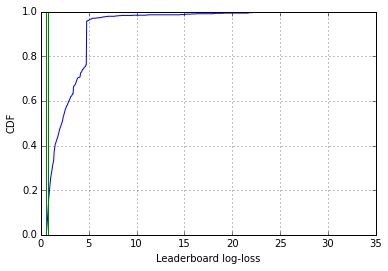

In [19]:
# evaluate the histogram
values, base = np.histogram(scores, bins=len(np.unique(scores)))
#evaluate the cumulative
cumulative = np.cumsum(values)
cumulative = (cumulative+0.0) / cumulative[-1]
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue')
plt.plot([scores[0],scores[0]],[0,1], c='green')
plt.plot([0.704582,0.704582],[0,1], c='green')

plt.xlabel('Leaderboard log-loss')
plt.ylabel('CDF')

plt.grid(True)
plt.show()

In [20]:
# evaluate the histogram
values, base = np.histogram(scores, bins=250)

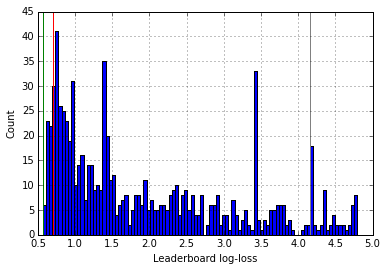

In [21]:
li = scores<4.795791

# evaluate the histogram
values, base = np.histogram(scores[li], bins=100)

# plot the cumulative function
#plt.plot(base[:-1], values, c='blue')
plt.bar(base[:-1], values, width=(base[1]-base[0]))

plt.plot([scores[0],scores[0]],[0,45], c='green')
plt.plot([0.704582,0.704582],[0,45], c='red')
plt.plot([4.161789,4.161789],[0,45], c='grey')
#plt.plot([4.795791,4.795791],[0,45], c='grey')

plt.xlabel('Leaderboard log-loss')
plt.ylabel('Count')

plt.grid(True)

plt.savefig("leaderboard.svg", close=False, verbose=True)

In [22]:
import seaborn as sns

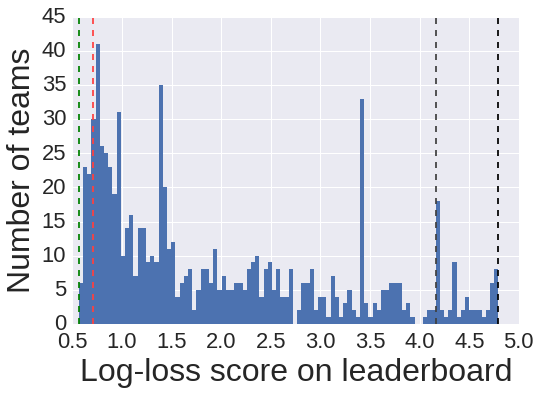

In [65]:
li = scores<4.795791

# evaluate the histogram
values, base = np.histogram(scores[li], bins=100)

# plot the cumulative function
#plt.plot(base[:-1], values, c='blue')
plt.bar(base[:-1], values, width=(base[1]-base[0]), edgecolor='None')

plt.plot([scores[0],scores[0]],[0,45], '--', c='green')
plt.plot([0.704582,0.704582],[0,45], '--', c=[1, .25, .25])
plt.plot([4.161789,4.161789],[0,45], '--', c=[.25, .25, .25])
plt.plot([4.795791,4.795791],[0,45], '--', c='black')

plt.tick_params(axis='both', which='major', labelsize=22)
plt.tick_params(axis='both', which='minor', labelsize=22)

plt.xlabel('Log-loss score on leaderboard', fontsize=32)
plt.ylabel('Number of teams', fontsize=32)

plt.grid(True)

plt.savefig("leaderboard_sb.svg", bbox_inches='tight')